Load the dataset

In [10]:
import pandas as pd

# Load the uploaded dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing

Here you have to clean and normalize the dataset and extract the relevant features

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Check for missing values
print("Missing values:\n", X.isnull().sum())

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for better handling later
X_scaled_df = pd.DataFrame(X_scaled, columns=['Annual Income (scaled)', 'Spending Score (scaled)'])
print(X_scaled_df.head())


Missing values:
 Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
   Annual Income (scaled)  Spending Score (scaled)
0               -1.738999                -0.434801
1               -1.738999                 1.195704
2               -1.700830                -1.715913
3               -1.700830                 1.040418
4               -1.662660                -0.395980


# Kmeans Algo

In [12]:
# The initial random centroids
def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Update centroids by taking mean of all points in each cluster
def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            centroids[i] = cluster_points.mean(axis=0)
    return centroids

# Compute inertia (sum of squared distances to assigned centroid)
def compute_inertia(X, labels, centroids):
    inertia = 0
    for i in range(centroids.shape[0]):
        cluster_points = X[labels == i]
        distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
        inertia += np.sum(distances**2)
    return inertia

# Full KMeans Algorithm
def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)
        shift = np.linalg.norm(centroids - old_centroids)
        if shift < tol:
            break
    inertia = compute_inertia(X, labels, centroids)
    return labels, centroids, inertia

# Use the elbow method to find the optimal value of k and plot the elbow curve

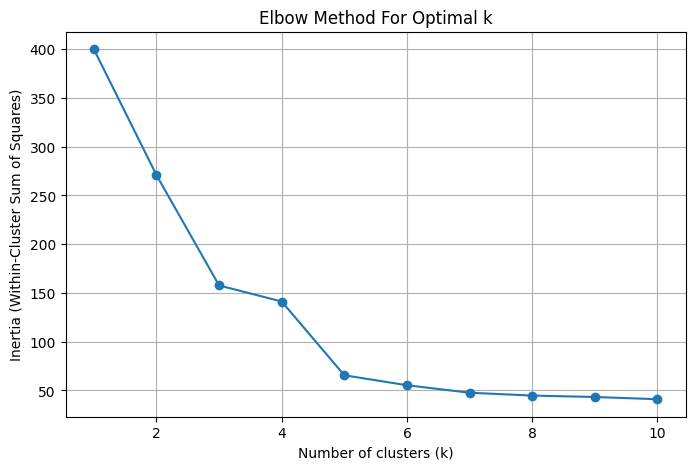

In [13]:
inertias = []
k_values = range(1, 11)

for k in k_values:
    labels, centroids, inertia = kmeans(X_scaled, k)
    inertias.append(inertia)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Final Clustering 

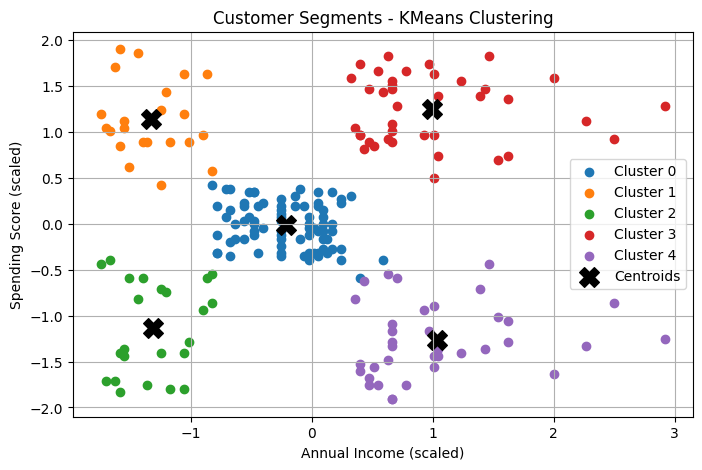

In [14]:

# Final clustering with chosen k 
k = 5  # Replace with the optimal k you found
labels, centroids, _ = kmeans(X_scaled, k)

# Plot the final clusters
plt.figure(figsize=(8, 5))
for cluster in range(k):
    cluster_points = X_scaled[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
    
# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')

plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments - KMeans Clustering')
plt.legend()
plt.grid(True)
plt.show()

# Briefly discuss what each of the clusters represents and what insights can be gained for the marketing team from this

Cluster 0: High Income, High Spending
Profile: Wealthy customers who spend a lot.

Insight: These are your premium customers. Offer them loyalty programs, exclusive deals, and premium services to retain and upsell them.

Cluster 1: Low Income, Low Spending
Profile: Budget-conscious customers with low spending.

Insight: Likely sensitive to price. Use discounts, bundles, or budget-oriented promotions to engage them.

Cluster 2: Average Income, High Spending
Profile: Moderate income, but high engagement/spending.

Insight: These are potential loyalists. Offer personalized recommendations and push them toward premium products through upselling.

Cluster 3: High Income, Low Spending
Profile: Affluent, but cautious spenders.

Insight: Likely need value justification. Focus on product quality, brand prestige, or limited-time offers to stimulate interest.

Cluster 4: Low Income, High Spending
Profile: Limited means, but still high spending.

Insight: These customers are brand-loyal or emotionally driven buyers. Consider subscription plans or credit options to retain them responsibly.